### Make sure GPU is on

https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import tensorflow_datasets as tfds
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util import montage

### (10 pts.) Prepare the datasets

#### load the plant_village data from tensorflow_datasets. Split by %80-10-10 train-val-test using split= input.

#### Please check https://www.tensorflow.org/datasets/splits

In [0]:
raw_test = tfds.load('plant_village', split = 'train[:10%]', as_supervised=True)    #to do
raw_val = tfds.load('plant_village', split = 'train[10:20%]',as_supervised=True)    #to do
raw_train = tfds.load('plant_village', split='train[20:100%]',as_supervised=True)   #to do

#### Normalize each image into [0,1] range, shuffle and minibatch 128.

In [0]:
pp_test = raw_test.map(lambda img, label: (tf.image.convert_image_dtype(img/255, tf.float32), label)).shuffle(1024).batch(128)    #to do
pp_val = raw_val.map(lambda img, label: (tf.image.convert_image_dtype(img/255, tf.float32), label)).shuffle(1024).batch(128)                  #to do
pp_train = raw_train.map(lambda img, label: (tf.image.convert_image_dtype(img/255, tf.float32), label)).shuffle(1024).batch(128)                #to do


In [0]:
pp_train.take(1)

<DatasetV1Adapter shapes: ((None, None, None, 3), (None,)), types: (tf.float32, tf.int64)>

#### Display the examples from the dataset.

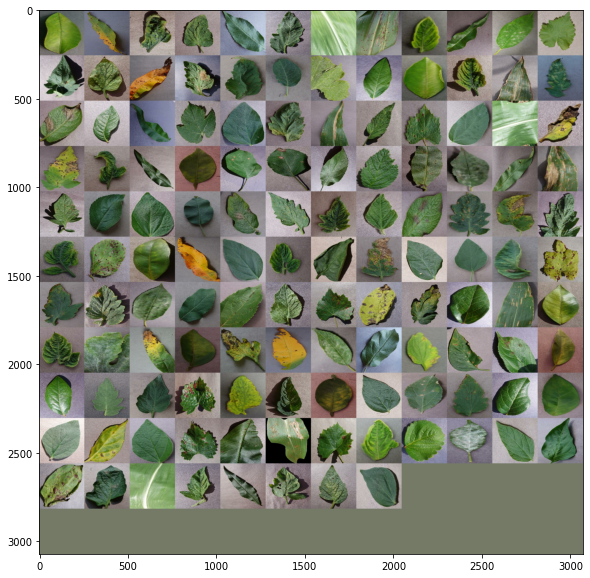

In [0]:
plt.figure(figsize=(10,10))
for example in pp_train.take(1):  # Only take a single example
  image, label = example[0], example[1]
  plt.imshow(montage(image, multichannel=True))

### (20 pts) The Fully Connected Neural Network implementation

#### It is a 4 layer (Fully Connected) Neural Network. The feature depths are [512,256,128] and last softmax layer has 38 output. Train for 10 epochs, with 0.001 learning rate and categorical cross entropy.

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(256,256,3)),
    tf.keras.layers.Flatten(),                              ### Flatten
    tf.keras.layers.Dense(512, activation="relu", input_shape=(256,256,3)),          ### Dense
    tf.keras.layers.Dense(256, activation="relu", input_shape=(256,256,3)),          ### Dense
    tf.keras.layers.Dense(128, activation="relu", input_shape=(256,256,3)),          ### Dense
    tf.keras.layers.Dense(38, activation='softmax' , input_shape=(256,256,3)),        ### Dense softmax
])

model.compile(
    loss= 'sparse_categorical_crossentropy',                ### loss function sparse_categorical_crossentropy
    optimizer = tf.keras.optimizers.Adam(lr=0.001),                 ### Adam optimizer  Default Learning Rate = 0.001
    metrics = ['accuracy']                                  ### metrics
)

history = model.fit(
    pp_train,
    epochs=10,
    validation_data=pp_val,
)

Epoch 1/10
340/340 [==============================] - 103s 302ms/step - loss: 10.2541 - accuracy: 0.1389 - val_loss: 3.0036 - val_accuracy: 0.1716
Epoch 2/10
340/340 [==============================] - 102s 301ms/step - loss: 2.8651 - accuracy: 0.2096 - val_loss: 2.7927 - val_accuracy: 0.2569
Epoch 3/10
340/340 [==============================] - 103s 302ms/step - loss: 2.6455 - accuracy: 0.2973 - val_loss: 2.5521 - val_accuracy: 0.3189
Epoch 4/10
340/340 [==============================] - 102s 301ms/step - loss: 2.5046 - accuracy: 0.3273 - val_loss: 2.4883 - val_accuracy: 0.3228
Epoch 5/10
340/340 [==============================] - 102s 301ms/step - loss: 2.2832 - accuracy: 0.3739 - val_loss: 2.1952 - val_accuracy: 0.3918
Epoch 6/10
340/340 [==============================] - 102s 301ms/step - loss: 2.1267 - accuracy: 0.4052 - val_loss: 2.1688 - val_accuracy: 0.3909
Epoch 7/10
340/340 [==============================] - 102s 301ms/step - loss: 1.9386 - accuracy: 0.4453 - val_loss: 1.8211 

#### Plot training & validation accuracy values

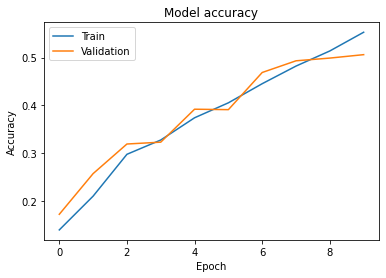

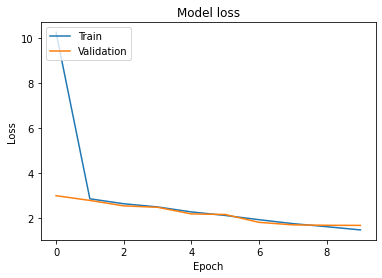

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Calculate test set

In [0]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(pp_test)
print('test loss, test acc:', results)


# Evaluate on test data
43/43 [==============================] - 8s 192ms/step - loss: 1.6857 - accuracy: 0.5116
test loss, test acc: [1.6856664419174194, 0.5116022229194641]


In [0]:
pp_val

<DatasetV1Adapter shapes: ((None, None, None, 3), (None,)), types: (tf.float32, tf.int64)>

### (20 pts.) The Convolutional Neural Network implementation

#### It is a 4 layer Convolutional Neural Network. First two layers are Convolutional and last two layers are Fully Connected. The depths are [64,128,64] and the last softmax layer has 38 output. Train for 10 epochs, with 0.001 learning rate and categorical cross entropy.

In [0]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.Input(shape=(256,256,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='relu', input_shape=(256,256,3)),       ### Conv2D layer
    tf.keras.layers.MaxPooling2D(pool_size=(2,2) , strides=1, padding='same'),                                      ### MaxPooling2D layer
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, activation='relu', input_shape=(256,256,3)),      ### Conv2D layer
    tf.keras.layers.MaxPooling2D(pool_size=(2,2) , strides=1, padding='same'),                                      ### MaxPooling2D layer
    
    tf.keras.layers.Flatten(),                                                                                      ### Flatten
    tf.keras.layers.Dense(64, activation='relu', input_shape=(196680,)),                                                                   ### Dense
    tf.keras.layers.Dense(38, activation='softmax', input_shape=(196680,)),                                                                ### Dense softmax
])

model_cnn.compile(
    loss= 'sparse_categorical_crossentropy',                ### loss function sparse_categorical_crossentropy
    optimizer = tf.keras.optimizers.Adam(),                 ### Adam optimizer  Default Learning Rate = 0.001
    metrics = ['accuracy']                                  ### metrics
)

history_cnn = model_cnn.fit(
    pp_train,
    epochs=10,
    validation_data=pp_val,
)

Epoch 1/10
340/340 [==============================] - 196s 578ms/step - loss: 1.6486 - accuracy: 0.6067 - val_loss: 0.8361 - val_accuracy: 0.7520
Epoch 2/10
340/340 [==============================] - 195s 573ms/step - loss: 0.5126 - accuracy: 0.8443 - val_loss: 0.5417 - val_accuracy: 0.8413
Epoch 3/10
340/340 [==============================] - 194s 571ms/step - loss: 0.2640 - accuracy: 0.9161 - val_loss: 0.4574 - val_accuracy: 0.8737
Epoch 4/10
340/340 [==============================] - 193s 569ms/step - loss: 0.1506 - accuracy: 0.9524 - val_loss: 0.5341 - val_accuracy: 0.8567
Epoch 5/10
340/340 [==============================] - 193s 568ms/step - loss: 0.0962 - accuracy: 0.9693 - val_loss: 0.6534 - val_accuracy: 0.8496
Epoch 6/10
340/340 [==============================] - 193s 568ms/step - loss: 0.0704 - accuracy: 0.9770 - val_loss: 0.7429 - val_accuracy: 0.8361
Epoch 7/10
340/340 [==============================] - 192s 566ms/step - loss: 0.0565 - accuracy: 0.9818 - val_loss: 0.5966 -

#### Plot training & validation accuracy values

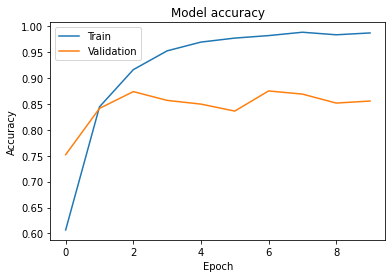

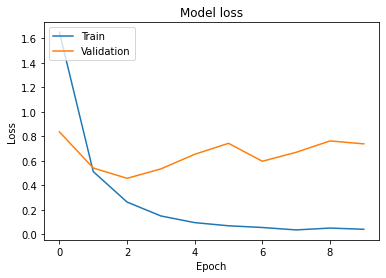

In [0]:
# Plot training & validation accuracy values
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Calculate test set

In [0]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model_cnn.evaluate(pp_test)
print('test loss, test acc:', results)


# Evaluate on test data
43/43 [==============================] - 11s 267ms/step - loss: 0.6603 - accuracy: 0.8689
test loss, test acc: [0.6602835059165955, 0.8688766360282898]
